In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import kendalltau
from numpy import log as ln

In [2]:
dataframe1 = pd.read_csv("Veriseti1.txt")
dataframe2 = pd.read_csv("Veriseti2.txt")

# storing dataframes in csv files
# Those dataframes will be used for train and validation sets
dataframe1.to_csv('Veriseti1.csv', index = None)
dataframe2.to_csv('Veriseti2.csv', index = None)


print(len(dataframe1), len(dataframe2))

8143 2665


In [3]:
# This dataframe will be used for test set
dataframe3 = pd.read_csv("Veriseti1.txt")
dataframe3.to_csv('Veriseti3.csv',  index = None)


In [4]:
# merging two dataframe to use together
merge_dataframe = dataframe1.append(dataframe2, ignore_index=True)
merge_dataframe

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.180000,27.272000,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.150000,27.267500,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.150000,27.245000,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.150000,27.200000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.100000,27.200000,426.0,704.50,0.004757,1
...,...,...,...,...,...,...,...
10803,2015-02-04 10:38:59,24.290000,25.700000,808.0,1150.25,0.004829,1
10804,2015-02-04 10:40:00,24.330000,25.736000,809.8,1129.20,0.004848,1
10805,2015-02-04 10:40:59,24.330000,25.700000,817.0,1125.80,0.004841,1
10806,2015-02-04 10:41:59,24.356667,25.700000,813.0,1123.00,0.004849,1


# Correlations and relations

In [5]:
merge_dataframe.info()
# "date" is a datetime type feature 
# label feature is a categorical 
# other features are numerical
# there is any null value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10808 non-null  object 
 1   Temperature    10808 non-null  float64
 2   Humidity       10808 non-null  float64
 3   Light          10808 non-null  float64
 4   CO2            10808 non-null  float64
 5   HumidityRatio  10808 non-null  float64
 6   Occupancy      10808 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 591.2+ KB


Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

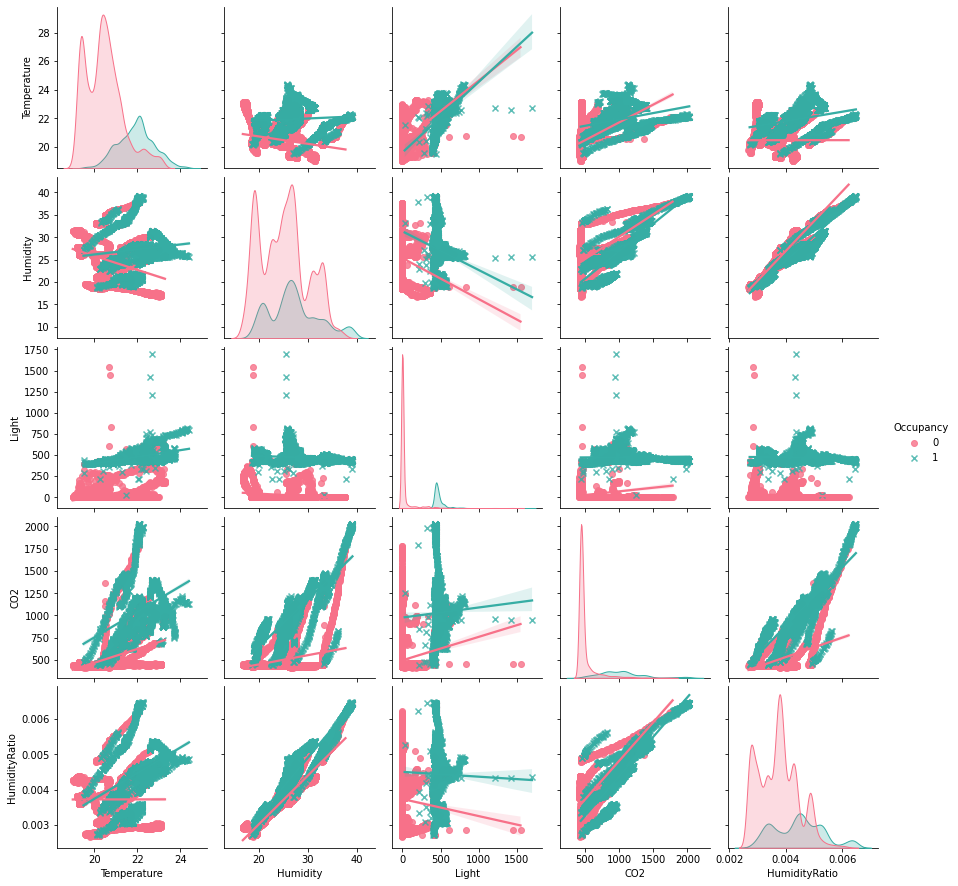

In [6]:
sns.pairplot(merge_dataframe, hue="Occupancy", kind = "reg", palette = "husl", markers=["o", "x"])

A scatter plot matrix is a grid (or matrix) of scatter plots used to visualize bivariate relationships between combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart

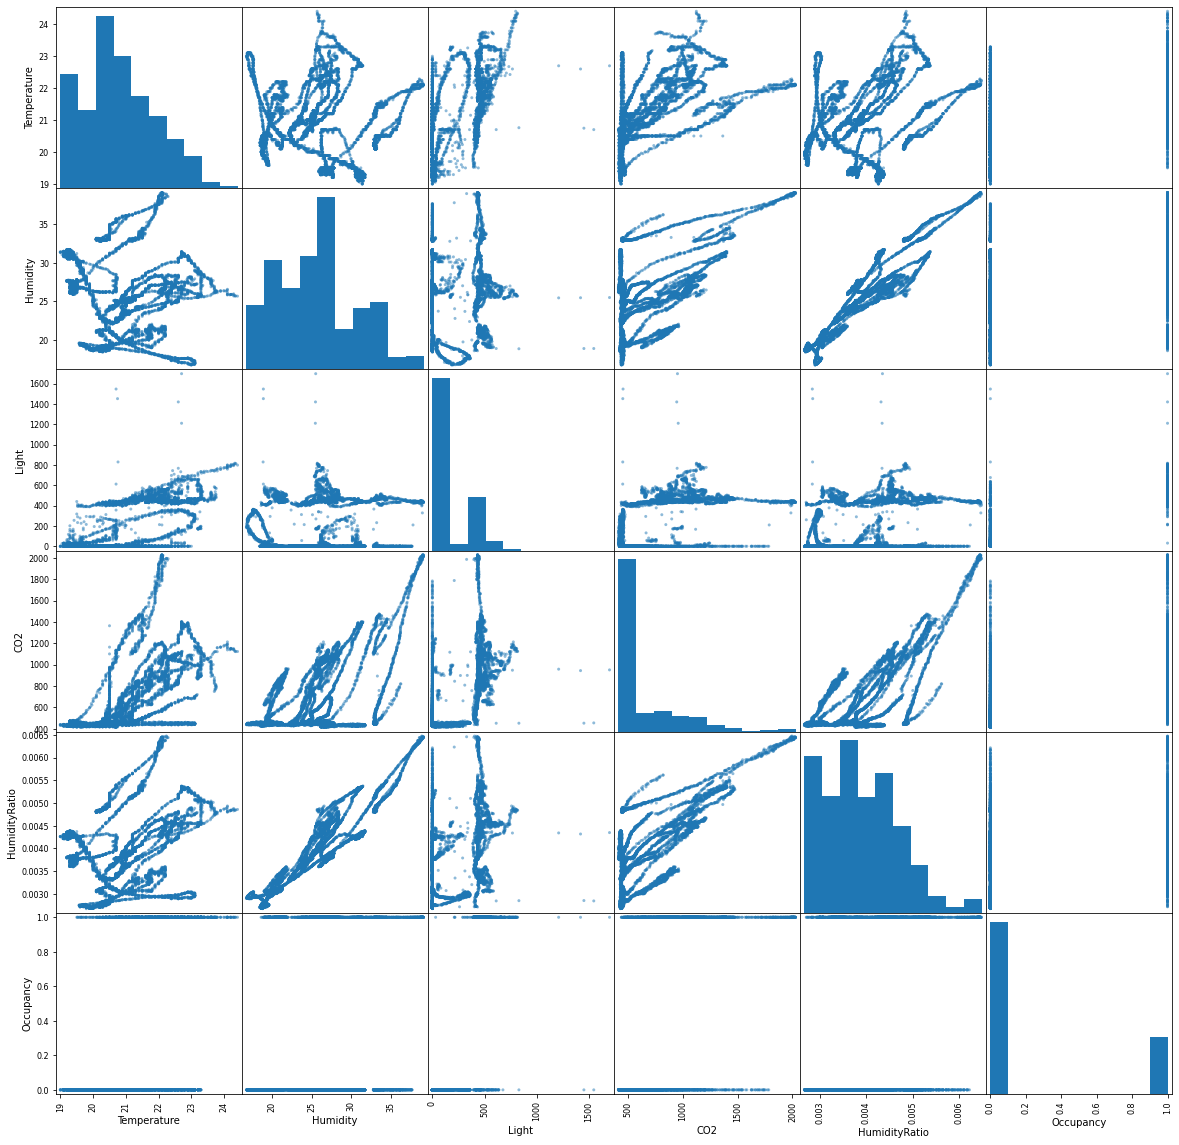

In [8]:
scatter_mat = scatter_matrix(merge_dataframe,figsize=(20, 20))

We see the correlation values between the features on the heatmap.

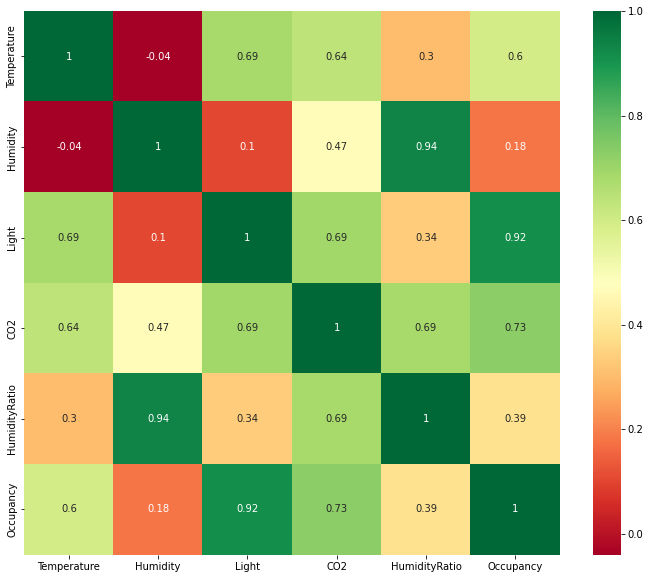

In [9]:
plt.figure(figsize=(12,10)) 
sns.heatmap(merge_dataframe.corr(), annot=True,cmap ='RdYlGn') 

As we can see, our label feature has good correlations light and CO2.

Temperature and Occupancy have medium correlations.

Humidity, HumidityRatio and Occupancy have low correlations. But they related each others. Maybe, combine those two we can extract new feature.

We may extract new feature that has more correlation with Occupancy using humidity and humidityratio

In [10]:
faeture_names = merge_dataframe.columns[:-1]
faeture_names

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')

For feature scaling, different methods can be used.

1-) Basic methods:
 * Missing values
 * Delete categorical features that has same values on each row
 * Delete categorical features that has different values on each row
 * Delete feature has low variance

2-) Filter methods:
 * Pearson Correlation
 * Chi2
 * Spearman's Correlation
 * Kendall's Tau Correlation
 * ANOVA Test 
 * Information Gain / Mutual Gain

 3-) Wrapped Methods:
 * Sequential Forward Selection
 * Sequential Backward Selection
 * Plus r - minus r selection
 * Sequential Forward Floating Selection
 * Sequential Backward Floating Selection

4-) Recursive Feature Elimination

5-) Select From Model

6-) Dimensionality Reduction 

Last three is more advanced topics so I didn't give details.


Firstly, I support to try filter methods. If we can get good results then other more advanced methods can be tried.

And our features are numerical and label feature is categorical type. So we should use ANOVA or Kendall's Tau methods.

In [11]:
# For the project, kendall's tau method is selected.
for i in faeture_names:
  corr, _ = kendalltau(merge_dataframe[i], merge_dataframe["Occupancy"])
  print("Feature: {}, output: {}".format(i, "Occupancy") + ' Kendall Rank correlation: %.5f' % corr)  

Feature: date, output: Occupancy Kendall Rank correlation: -0.13677
Feature: Temperature, output: Occupancy Kendall Rank correlation: 0.47805
Feature: Humidity, output: Occupancy Kendall Rank correlation: 0.14364
Feature: Light, output: Occupancy Kendall Rank correlation: 0.77245
Feature: CO2, output: Occupancy Kendall Rank correlation: 0.56169
Feature: HumidityRatio, output: Occupancy Kendall Rank correlation: 0.28681


Like on heatmap, best correlated features are light, CO2 and temperature.

Worst correlated features Humidity and HumidityRatio.

Informations on upper visual tables are verified.

In [12]:
# We said that maybe we can extract more correlated features combine humidity and humidityratio
merge_dataframe["combine_humidity"] = merge_dataframe["Humidity"] * merge_dataframe["HumidityRatio"]
merge_dataframe

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,combine_humidity
0,2015-02-04 17:51:00,23.180000,27.272000,426.0,721.25,0.004793,1,0.130714
1,2015-02-04 17:51:59,23.150000,27.267500,429.5,714.00,0.004783,1,0.130432
2,2015-02-04 17:53:00,23.150000,27.245000,426.0,713.50,0.004779,1,0.130216
3,2015-02-04 17:54:00,23.150000,27.200000,426.0,708.25,0.004772,1,0.129785
4,2015-02-04 17:55:00,23.100000,27.200000,426.0,704.50,0.004757,1,0.129390
...,...,...,...,...,...,...,...,...
10803,2015-02-04 10:38:59,24.290000,25.700000,808.0,1150.25,0.004829,1,0.124107
10804,2015-02-04 10:40:00,24.330000,25.736000,809.8,1129.20,0.004848,1,0.124758
10805,2015-02-04 10:40:59,24.330000,25.700000,817.0,1125.80,0.004841,1,0.124407
10806,2015-02-04 10:41:59,24.356667,25.700000,813.0,1123.00,0.004849,1,0.124608


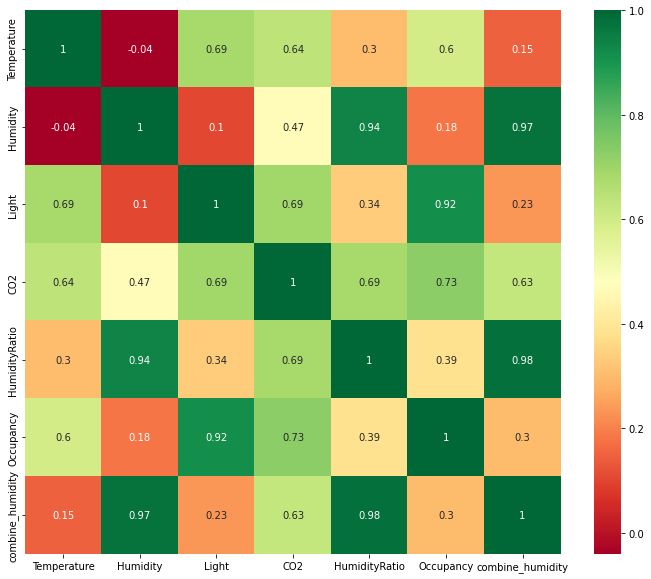

In [13]:
plt.figure(figsize=(12,10)) 
sns.heatmap(merge_dataframe.corr(), annot=True,cmap ='RdYlGn') 

combine_humidity has not good correlation but if we search the paper.

There is a method to create new feature using humidity and humidityratio.

For more details, you can read the paper.

In [24]:
def new_feature(data):
  T = (data["Temperature"] + 273.15)
  C1T = float(5.8002206E+03) / T
  C2 = float(1.3914993E+00) 
  C3T = float(-4.86402396E-02) * T 
  C4T2 = float(4.1764768E-05) * (T**2) 
  C5T3 = float(-1.44592093E-08) * (T**3) 
  C6lnT = float(6.5459673E+00) * (ln(T))

  pws = C1T + C2 + C3T + C4T2 + C5T3 + C6lnT
  pw = data["Humidity"] * pws 
  p = 101.325
  W = (0.622) * (pw / (p-pw))

  return W 

In [25]:
merge_dataframe["combine_humidity"] = new_feature(merge_dataframe) 
merge_dataframe

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,combine_humidity
0,2015-02-04 17:51:00,23.180000,27.272000,426.0,721.25,0.004793,1,-0.675268
1,2015-02-04 17:51:59,23.150000,27.267500,429.5,714.00,0.004783,1,-0.675275
2,2015-02-04 17:53:00,23.150000,27.245000,426.0,713.50,0.004779,1,-0.675323
3,2015-02-04 17:54:00,23.150000,27.200000,426.0,708.25,0.004772,1,-0.675418
4,2015-02-04 17:55:00,23.100000,27.200000,426.0,704.50,0.004757,1,-0.675414
...,...,...,...,...,...,...,...,...
10803,2015-02-04 10:38:59,24.290000,25.700000,808.0,1150.25,0.004829,1,-0.678928
10804,2015-02-04 10:40:00,24.330000,25.736000,809.8,1129.20,0.004848,1,-0.678845
10805,2015-02-04 10:40:59,24.330000,25.700000,817.0,1125.80,0.004841,1,-0.678932
10806,2015-02-04 10:41:59,24.356667,25.700000,813.0,1123.00,0.004849,1,-0.678935


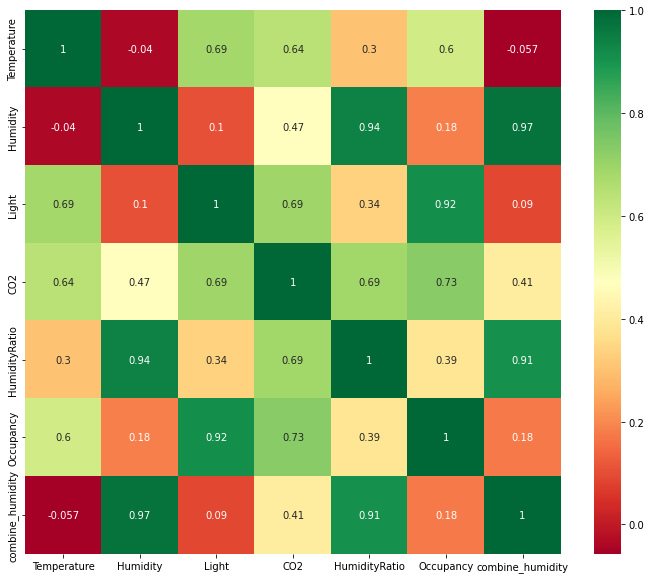

In [ ]:
plt.figure(figsize=(12,10)) 
sns.heatmap(merge_dataframe.corr(), annot=True,cmap ='RdYlGn') 

In [14]:
y_labels = merge_dataframe["Occupancy"] # get the outputs
X_features = merge_dataframe.copy() 
del X_features["Occupancy"] # delete label column

# if we check the "date" column, there is just 8-10 days and approximately all "date" rows different each other
# so I wanted to delete "date" column because of it is not a good feature according to upper line. Second reason is that "date" feature has low corroleation.
# If we can't get good results we can check again "date" feature as time series. 
del X_features["date"]
X_features

,Temperature,Humidity,Light,CO2,HumidityRatio,combine_humidity
0,23.180000,27.272000,426.0,721.25,0.004793,0.130714
1,23.150000,27.267500,429.5,714.00,0.004783,0.130432
2,23.150000,27.245000,426.0,713.50,0.004779,0.130216
3,23.150000,27.200000,426.0,708.25,0.004772,0.129785
4,23.100000,27.200000,426.0,704.50,0.004757,0.129390
...,...,...,...,...,...,...
10803,24.290000,25.700000,808.0,1150.25,0.004829,0.124107
10804,24.330000,25.736000,809.8,1129.20,0.004848,0.124758
10805,24.330000,25.700000,817.0,1125.80,0.004841,0.124407
10806,24.356667,25.700000,813.0,1123.00,0.004849,0.124608


Features have different scales so we should normalize the features.

Espacially, for some ML techniques, normalization is a wonderful method.
(E.g. KNN, Support Vector Machines) 

In [15]:
from mlxtend.preprocessing import minmax_scaling

columns = list(X_features.columns)
X_scaled_data = minmax_scaling(X_features, columns = columns)
X_scaled_data

,Temperature,Humidity,Light,CO2,HumidityRatio,combine_humidity
0,0.772881,0.470533,0.250994,0.190933,0.557318,0.402348
1,0.767334,0.470332,0.253056,0.186446,0.554807,0.400967
2,0.767334,0.469326,0.250994,0.186136,0.553761,0.399909
3,0.767334,0.467315,0.250994,0.182887,0.551669,0.397795
4,0.758089,0.467315,0.250994,0.180566,0.547851,0.395860
...,...,...,...,...,...,...
10803,0.978120,0.400268,0.476064,0.456444,0.566811,0.369975
10804,0.985516,0.401877,0.477125,0.443416,0.571681,0.373162
10805,0.985516,0.400268,0.481367,0.441312,0.569883,0.371446
10806,0.990447,0.400268,0.479010,0.439579,0.571935,0.372428


In [18]:
# same process for test dataset

#dataframe3["combine_humidity"] = dataframe3["Humidity"] * dataframe3["HumidityRatio"] # if wants to use our new feature

dataframe3["combine_humidity"] = new_feature(dataframe3) # if wants to use the paper's new feature 

y_test_labels = dataframe3["Occupancy"]
X_test_features = dataframe3.copy()
del X_test_features["Occupancy"]
del X_test_features["date"]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_features, y_labels, test_size=0.3, random_state=0)

# Model Pipeline

All basic classification algorithms and classification metrics 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [21]:
model_pipeline = [] # we will train on all algorithms
model_pipeline.append(LogisticRegression())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(GaussianNB())

model_list = ["Logistic Regression", "Decision Trees", "Random Forests", "SVC", "KNN", "Naive Bayes"]
acc_list = []
precision_list = []
recall_list = []
f1_score_list = []

auc_list = []
cm_list = []


for model in model_pipeline:
  model.fit(X_train,y_train) # train the model
  y_pred = model.predict(X_val) # prediction

  acc_list.append(accuracy_score(y_val, y_pred))
  precision_list.append(precision_score(y_val, y_pred))
  recall_list.append(recall_score(y_val, y_pred))
  f1_score_list.append(f1_score(y_val, y_pred))

  fpr, tpr , _thresholds = roc_curve(y_val, y_pred)
  auc_list.append(round(auc(fpr,tpr),2))
  cm_list.append(confusion_matrix(y_val, y_pred))


Show all metric values of all algorithm results

In [23]:
result_df = pd.DataFrame({"Model":model_list, "Accuracy":acc_list, "Precision":precision_list, "Recall":recall_list, "F1 Score":f1_score_list }) 
result_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.983349,0.938032,0.996129,0.966208
1,Decision Trees,0.989824,0.974425,0.983226,0.978805
2,Random Forests,0.991674,0.973418,0.992258,0.982748
3,SVC,0.983349,0.938032,0.996129,0.966208
4,KNN,0.986432,0.952912,0.992258,0.972187
5,Naive Bayes,0.960839,0.861607,0.996129,0.923998


Show confusion matrix of all algorithm results

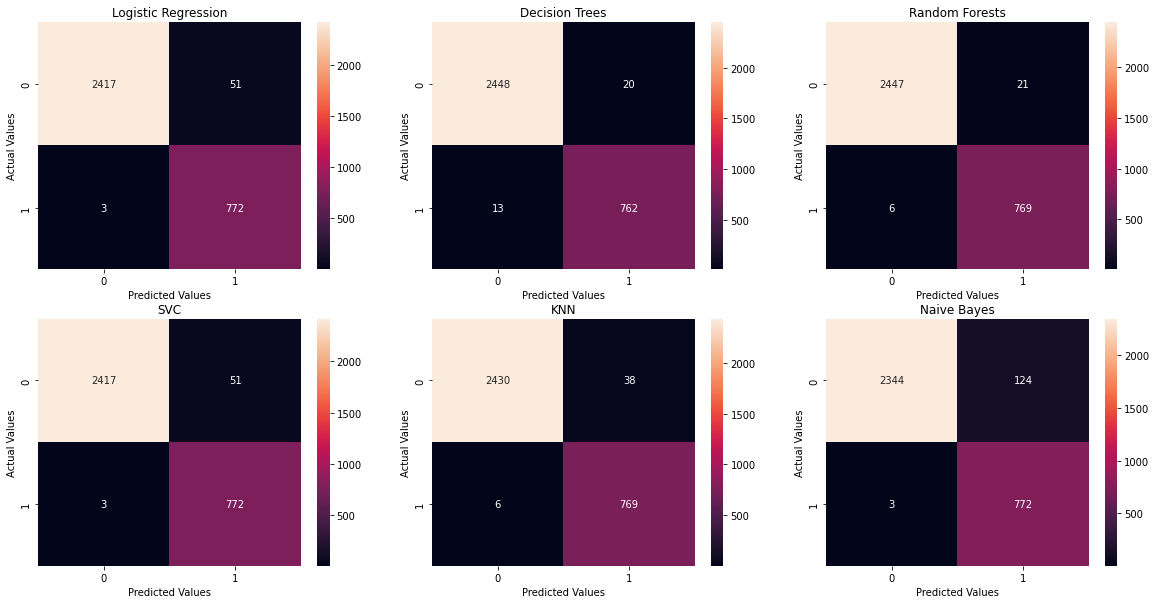

In [26]:
fig = plt.figure(figsize = (20,10))
for i in range(len(cm_list)):
  cm = cm_list[i]
  model = model_list[i]
  sub = fig.add_subplot(2,3,i+1).set_title(model)
  cm_plot = sns.heatmap(cm, annot=True, fmt='g')
  cm_plot.set_xlabel("Predicted Values")
  cm_plot.set_ylabel("Actual Values")

# TEST DATA

In [34]:
test_acc_list = []
test_precision_list = []
test_recall_list = []
test_f1_score_list = []

test_auc_list = []
test_cm_list = []


for model in model_pipeline:
  y_pred = model.predict(X_test_features) # predict test dataset

  test_acc_list.append(accuracy_score(y_test_labels, y_pred))
  test_precision_list.append(precision_score(y_test_labels, y_pred))
  test_recall_list.append(recall_score(y_test_labels, y_pred))
  test_f1_score_list.append(f1_score(y_test_labels, y_pred))

  fpr, tpr , _thresholds = roc_curve(y_test_labels, y_pred)
  test_auc_list.append(round(auc(fpr,tpr),2))
  test_cm_list.append(confusion_matrix(y_test_labels, y_pred))

In [35]:
result_df = pd.DataFrame({"Model":model_list, "Accuracy":test_acc_list, "Precision":test_precision_list, "Recall":test_recall_list, "F1 Score":test_f1_score_list }) 
result_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.988334,0.950386,0.997108,0.973187
1,Decision Trees,0.997544,0.993076,0.995373,0.994223
2,Random Forests,0.997667,0.991945,0.997108,0.994520
3,SVC,0.988579,0.951435,0.997108,0.973736
4,KNN,0.989807,0.959263,0.994216,0.976427
5,Naive Bayes,0.965123,0.860349,0.997687,0.923942


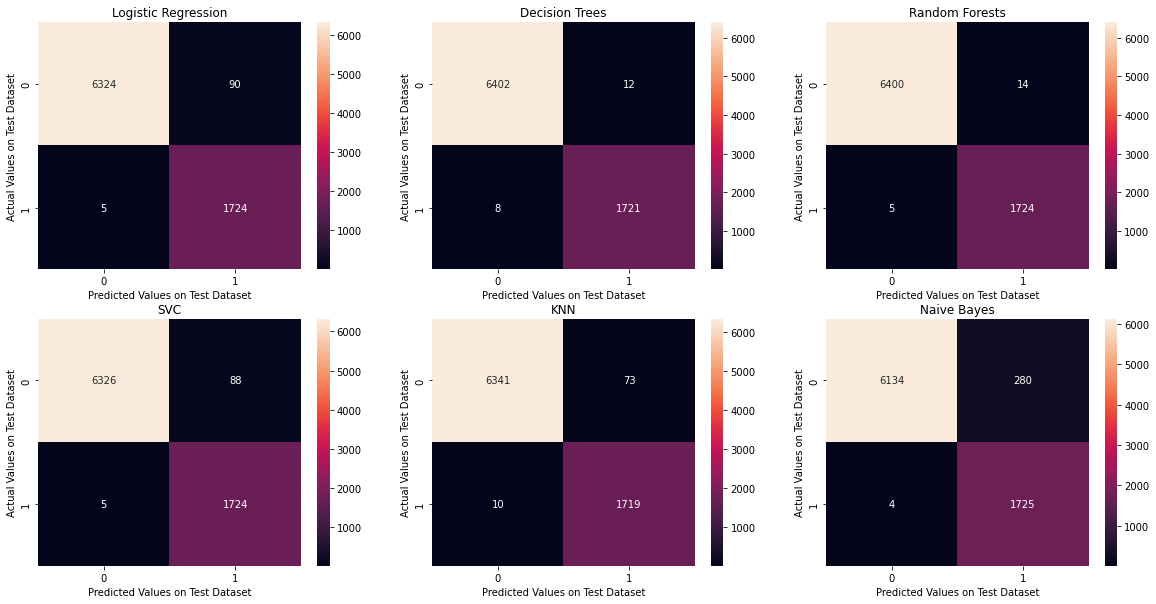

In [36]:
fig_test = plt.figure(figsize = (20,10))
for i in range(len(test_cm_list)):
  cm = test_cm_list[i]
  model = model_list[i]
  sub = fig_test.add_subplot(2,3,i+1).set_title(model)
  cm_plot = sns.heatmap(cm, annot=True, fmt='g')
  cm_plot.set_xlabel("Predicted Values on Test Dataset")
  cm_plot.set_ylabel("Actual Values on Test Dataset")

# RANDOM FORESTS IS THE BEST ALGORITHM ON THE PROJECT FOR TRAIN,VALIDATION AND TEST DATA